In [3]:
import pandas as pd

# Load the dataset
file_path = 'pizza-hut-reviews.csv'
reviews_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
reviews_df.head()


,id,review,created_at,ratings,upvotes
0,1,The staff Alexa was very kind and helpful. I h...,"May 28, 2022",1,0
1,2,"I ordered 4 pizzas One veggie lover, one chees...","May 18, 2022",1,0
2,3,"My experience was bad. Had a long day, want to...","May 15, 2022",1,0
3,4,"I do not suggest you order from Pizza Hut, I l...","May 14, 2022",1,2
4,5,Pizza Hut is a scam! I never got my pizza deli...,"May 12, 2022",1,0


In [5]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 660.6 kB/s eta 0:00:01
   ---- ---------------------------------- 71.7/626.3 kB 787.7 kB/s eta 0:00:01
   ------------- -------------------------- 204.8/626.3 kB 1.6 MB/s eta 0:00:01
   --------------------- ------------------ 337.9/626.3 kB 1.8 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
from textblob import TextBlob

# Function to classify sentiment
def classify_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the reviews
reviews_df['sentiment'] = reviews_df['review'].apply(classify_sentiment)

# Preview the dataframe with sentiment analysis results
reviews_df.head()


,id,review,created_at,ratings,upvotes,sentiment
0,1,The staff Alexa was very kind and helpful. I h...,"May 28, 2022",1,0,Positive
1,2,"I ordered 4 pizzas One veggie lover, one chees...","May 18, 2022",1,0,Positive
2,3,"My experience was bad. Had a long day, want to...","May 15, 2022",1,0,Positive
3,4,"I do not suggest you order from Pizza Hut, I l...","May 14, 2022",1,2,Positive
4,5,Pizza Hut is a scam! I never got my pizza deli...,"May 12, 2022",1,0,Negative


In [7]:
# Aggregate insights on sentiment
sentiment_counts = reviews_df['sentiment'].value_counts(normalize=True) * 100

# Summary of ratings
ratings_summary = reviews_df['ratings'].describe()

sentiment_counts, ratings_summary


(sentiment
 Negative    49.752066
 Positive    48.099174
 Neutral      2.148760
 Name: proportion, dtype: float64,
 count    605.000000
 mean       1.515702
 std        1.174439
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        1.000000
 max        5.000000
 Name: ratings, dtype: float64)

In [10]:
pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 660.6 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/300.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.6 MB/s eta 0:00:00


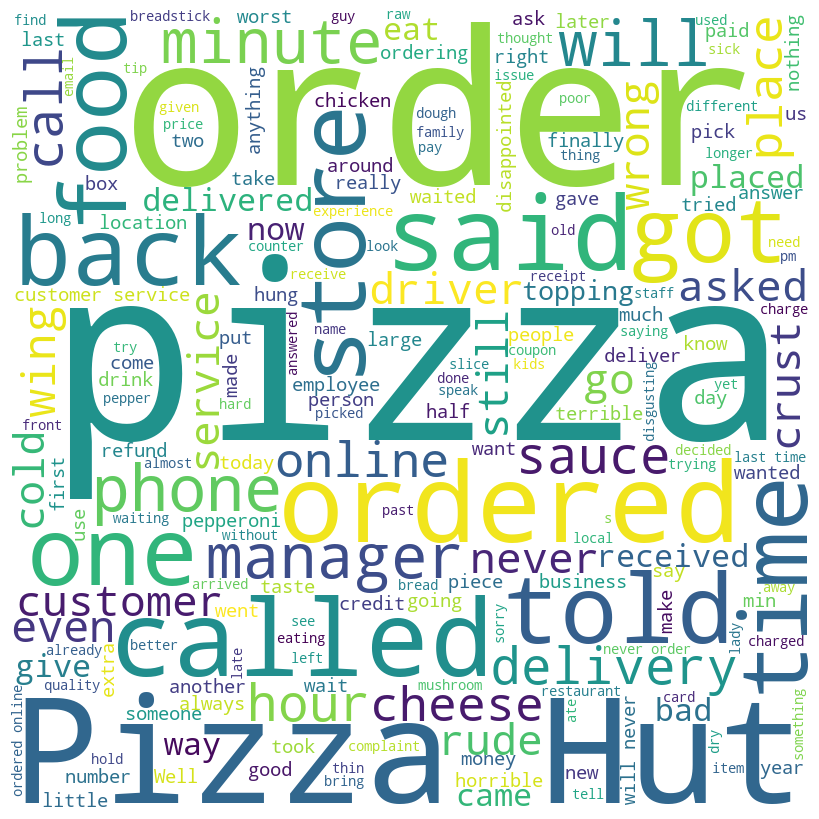

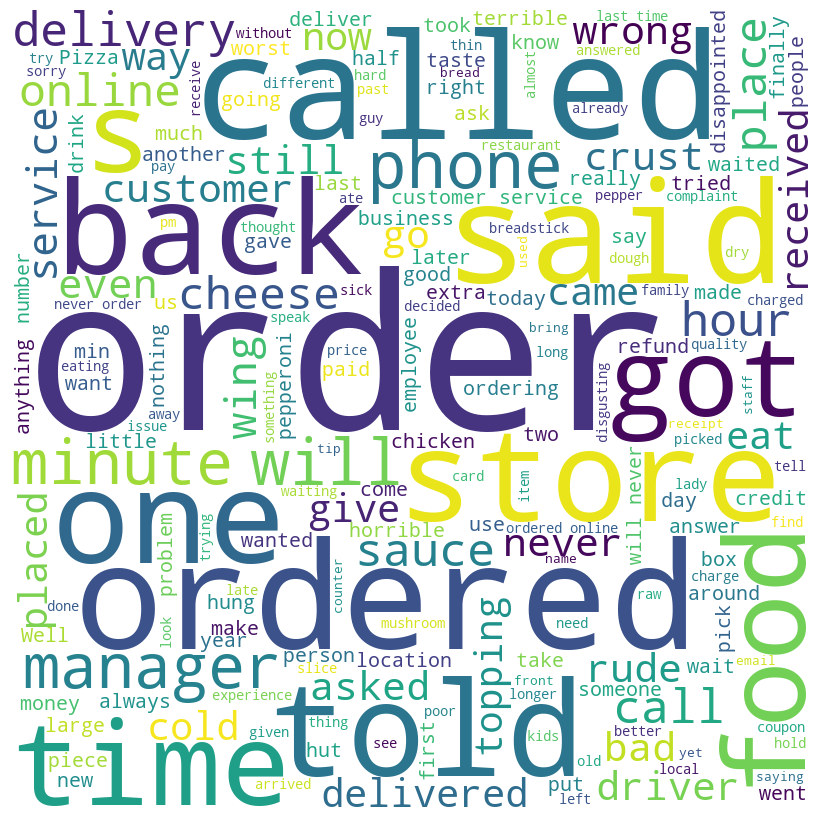

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter negative reviews
negative_reviews = reviews_df[reviews_df['sentiment'] == 'Negative']['review']

# Generate a word cloud for negative reviews
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(' '.join(negative_reviews))

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

# Prepare text for analysis by removing specific words like "Pizza" and "Pizza Hut"
filtered_negative_reviews = negative_reviews.apply(lambda x: x.replace('Pizza Hut', '').replace('pizza', ''))

# Generate a new word cloud for the filtered negative reviews
wordcloud_filtered = WordCloud(width = 800, height = 800, 
                               background_color ='white', 
                               min_font_size = 10).generate(' '.join(filtered_negative_reviews))

# Plot the new word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_filtered) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


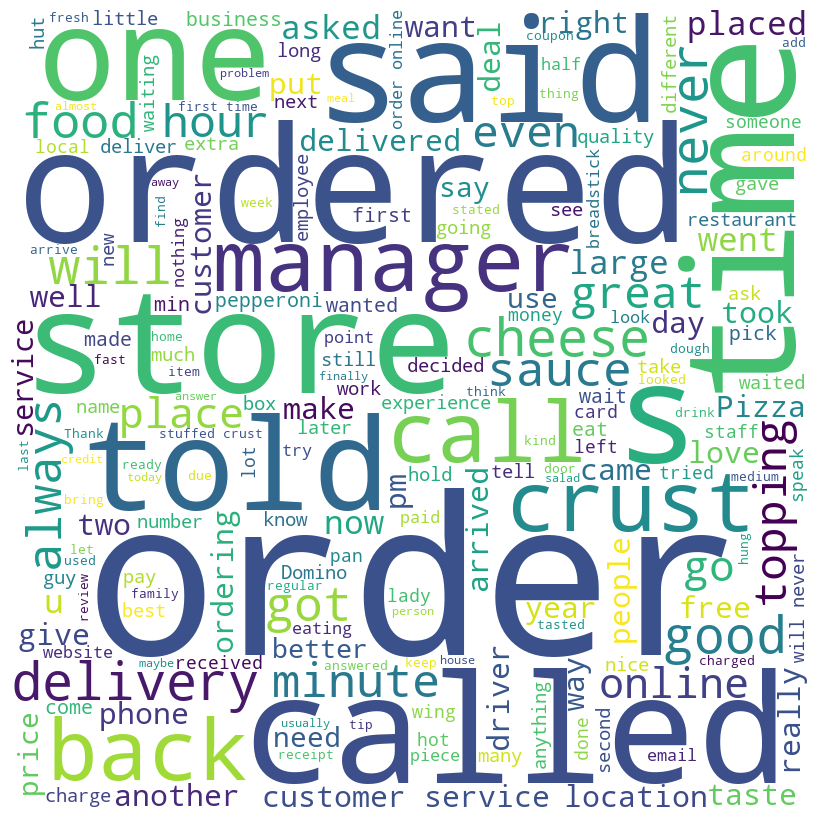

In [12]:
# Filter positive reviews
positive_reviews = reviews_df[reviews_df['sentiment'] == 'Positive']['review']

# Prepare text for analysis by removing specific words to focus on general feedback
filtered_positive_reviews = positive_reviews.apply(lambda x: x.replace('Pizza Hut', '').replace('pizza', ''))

# Generate a word cloud for the filtered positive reviews
wordcloud_positive_filtered = WordCloud(width = 800, height = 800, 
                                        background_color ='white', 
                                        min_font_size = 10).generate(' '.join(filtered_positive_reviews))

# Plot the word cloud for positive feedback
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_positive_filtered) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


In [13]:
# Load the combined dataset from the provided Excel file
file_path_combined = 'Total Review.xlsx'
combined_reviews_df = pd.read_excel(file_path_combined)

# Display the first few rows of the combined dataset to understand its structure
combined_reviews_df.head()


,Restaurant Name,Review,Rating,Time Created,User Name
0,Pizza Hut,Every time I order from this Pizza Hut somethi...,1,2023-12-03 14:49:27,Rosa-lyn M.
1,Pizza Hut,"I'd seen the signs for a whole, but never got ...",3,2022-05-16 14:19:15,Farrah B.
2,Pizza Hut,Spoke to a rep on the phone some Indian guy an...,1,2023-11-25 22:56:59,Juan C.
3,California Pizza Kitchen,This location is in that more suburban part of...,4,2024-03-12 18:21:14,Monica T.
4,California Pizza Kitchen,After the movies took my folks out for a quick...,3,2023-12-31 13:25:16,Danni H.


C:\Users\fahad\AppData\Local\Temp\ipykernel_20508\3555331946.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews_df['Cleaned_Review'] = negative_reviews_df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
C:\Users\fahad\AppData\Local\Temp\ipykernel_20508\3555331946.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews_df['Cleaned_Review'] = negative_reviews_df['Cleaned_Review'].str.lower()
C:\Users\fahad\AppData\Local\Temp\ipykernel_20508\35

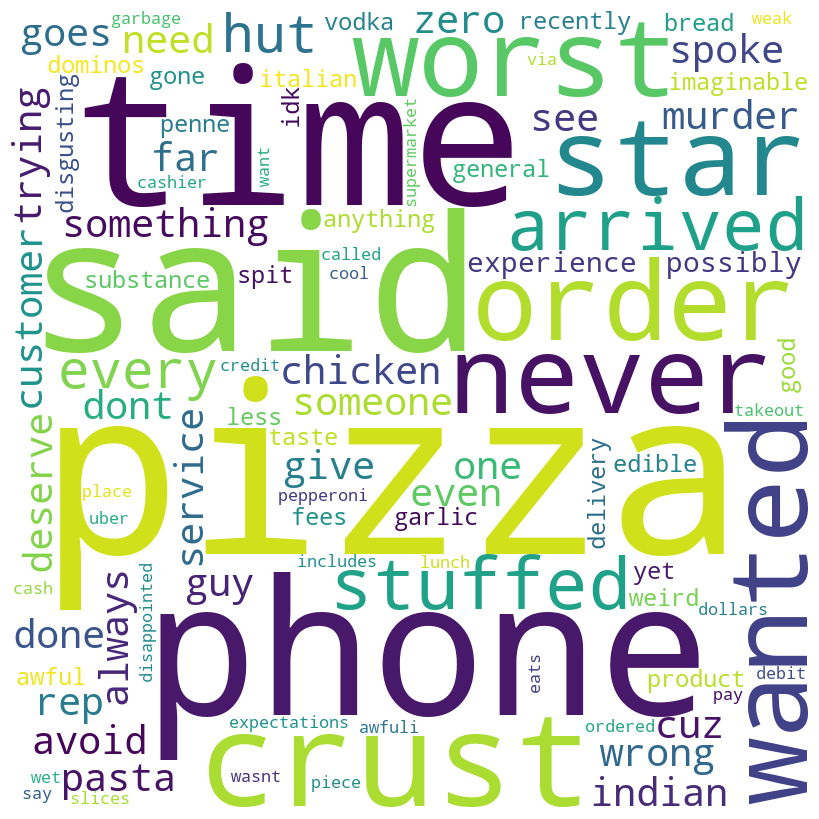

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Assuming you've loaded your dataset into a DataFrame named 'combined_reviews_df'

# Step 1: Filter Negative Reviews
negative_reviews_df = combined_reviews_df[combined_reviews_df['Rating'] <= 2]

# Step 2: Preprocess Text Data
# Remove punctuation
negative_reviews_df['Cleaned_Review'] = negative_reviews_df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# Convert to lowercase
negative_reviews_df['Cleaned_Review'] = negative_reviews_df['Cleaned_Review'].str.lower()
# Remove stopwords
stop_words = set(stopwords.words('english'))
negative_reviews_df['Cleaned_Review'] = negative_reviews_df['Cleaned_Review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# Step 3: Identify Common Negative Words
# Concatenate all review texts
all_reviews_text = ' '.join(review for review in negative_reviews_df['Cleaned_Review'])

# Step 4: Visualize Common Negative Feedback
wordcloud = WordCloud(width = 800, height = 800, background_color ='white').generate(all_reviews_text)

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


In [15]:
pip install nltk


In [16]:
import nltk

# Download the 'punkt' and 'stopwords' datasets
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fahad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fahad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Example text
text = "This is an example sentence. Note: it won't, stop at stopwords!"

# Tokenize the text
tokens = word_tokenize(text)

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from tokens
filtered_tokens = [word for word in tokens if word not in stop_words]

print(filtered_tokens)


['This', 'example', 'sentence', '.', 'Note', ':', 'wo', "n't", ',', 'stop', 'stopwords', '!']


C:\Users\fahad\AppData\Local\Temp\ipykernel_20508\2623815645.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews_df['Cleaned_Review'] = negative_reviews_df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
C:\Users\fahad\AppData\Local\Temp\ipykernel_20508\2623815645.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews_df['Cleaned_Review'] = negative_reviews_df['Cleaned_Review'].str.lower()
C:\Users\fahad\AppData\Local\Temp\ipykernel_20508\26

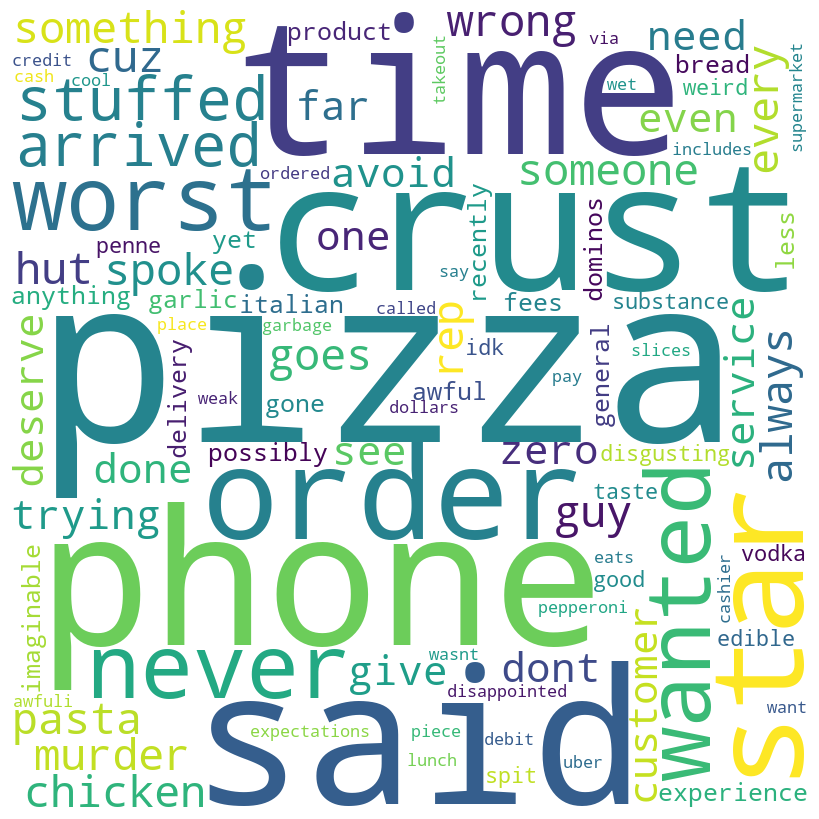

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Assuming you've loaded your dataset into a DataFrame named 'combined_reviews_df'

# Step 1: Filter Negative Reviews
negative_reviews_df = combined_reviews_df[combined_reviews_df['Rating'] <= 2]

# Step 2: Preprocess Text Data
# Remove punctuation
negative_reviews_df['Cleaned_Review'] = negative_reviews_df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# Convert to lowercase
negative_reviews_df['Cleaned_Review'] = negative_reviews_df['Cleaned_Review'].str.lower()
# Remove stopwords
stop_words = set(stopwords.words('english'))
negative_reviews_df['Cleaned_Review'] = negative_reviews_df['Cleaned_Review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# Additional Step: Remove specific words (e.g., "Indian")
specific_words_to_remove = ['indian']
negative_reviews_df['Cleaned_Review'] = negative_reviews_df['Cleaned_Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in specific_words_to_remove]))

# Step 3: Identify Common Negative Words
# Concatenate all review texts
all_reviews_text = ' '.join(review for review in negative_reviews_df['Cleaned_Review'])

# Step 4: Visualize Common Negative Feedback
wordcloud = WordCloud(width = 800, height = 800, background_color ='white').generate(all_reviews_text)

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()
